**Medical Cost Prediction**


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Step 1: Reading and Understanding the Data**

Let's start with the following steps:

    1.Importing data using the pandas library
    2.Understanding the structure of the data

In [2]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
#Checking for duplicates
data.loc[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
#We found that index 581 example is duplicated so we should delete
data = data.drop(581)

In [9]:
#Checking again
data.loc[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
#Converting categoric values to numeric values
data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].cat.codes

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [13]:
data['smoker'] = data['smoker'].astype('category')
data['smoker'] = data['smoker'].cat.codes

data['region'] = data['region'].astype('category')
data['region'] = data['region'].cat.codes

In [14]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [15]:
#Checking if any null values exist
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Step 2: Creating Model**

In [16]:
x = data.drop(columns = 'charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [17]:
y = data['charges']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =0)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
b = model.intercept_
b

-10658.974155442058

In [22]:
w = model.coef_
w

array([  244.40254189,  -203.81680641,   308.01805142,   495.56546634,
       23771.78167483,  -377.96465113])

In [23]:
y_pred_train = model.predict(x_train)

y_pred_train

array([30787.46959393,  3385.58700018, 31020.21886095, ...,
        7946.07752068,  4346.77404975, 11216.43142885])

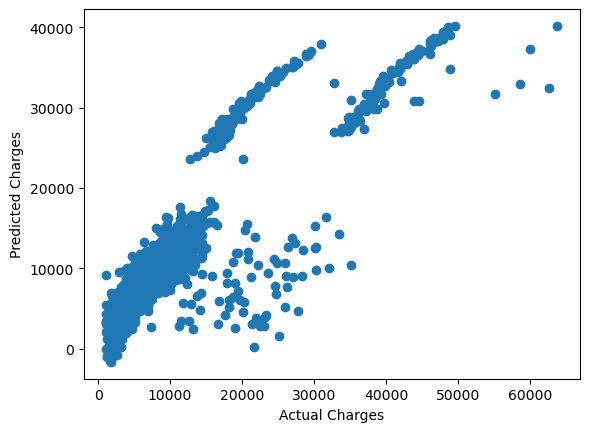

In [24]:
#Comparing y_train vs predicted y_train
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

In [25]:
#R^2 score means that our model how well predict
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)
#It is approximately 75% estimated correctly!

0.7487799749798774

In [26]:
#This time trying with testing data
y_pred_test = model.predict(x_test)

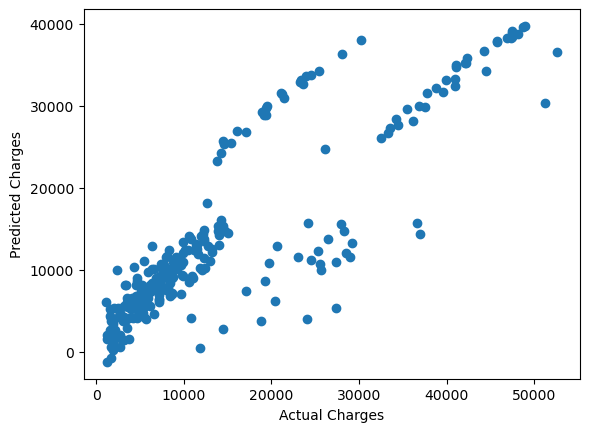

In [27]:
#Comparing y_test vs predicted y_test
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

In [28]:
#As you see, our train set and test set accuracy is so similar. 
#Also when you look two graph, you can see again
r2_score(y_test,y_pred_test)


0.7526726290709553